### Linear Regression to predict 'selling price' of Homes

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
file_path = "data/homes.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.replace('"', '').str.strip()

# Display dataset info
df.info()

# Display summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     int64  
 1   List    50 non-null     int64  
 2   Living  50 non-null     int64  
 3   Rooms   50 non-null     int64  
 4   Beds    50 non-null     int64  
 5   Baths   50 non-null     int64  
 6   Age     50 non-null     int64  
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


Dataset Overview
This dataset contains information about 50 homes with the following variables:

Sell: Selling price of the house (dependent variable in regression analysis), 
List: Listing price of the house, 
Living: Square footage of living space, 
Rooms: Number of rooms in the house, 
Beds: Number of bedrooms, 
Baths: Number of bathrooms, 
Age: Age of the house in years, 
Acres: Lot size in acres, 
Taxes: Annual property taxes

All variables appear to be numerical, with Acres being a float and the rest being integers.


I will now conduct three EDA techniques:

1) Checking for missing values and data distribution
2) Correlation analysis
3) Visualizing the relationship between key variables

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Sell      0
List      0
Living    0
Rooms     0
Beds      0
Baths     0
Age       0
Acres     0
Taxes     0
dtype: int64


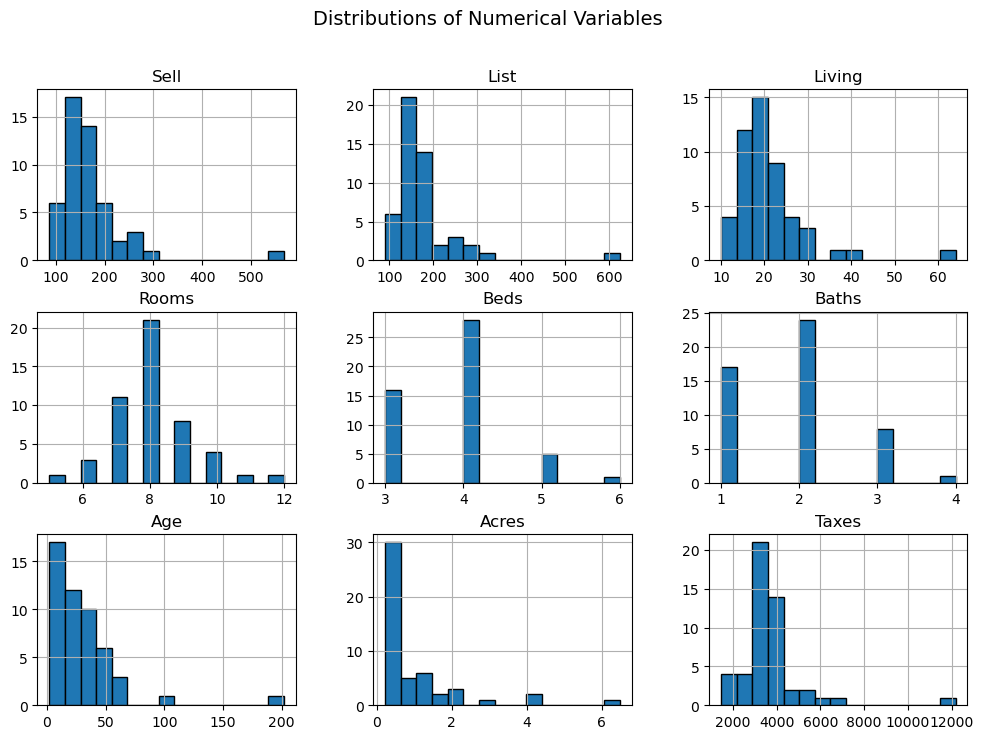

In [5]:
# Plot distributions of numerical variables
df.hist(figsize=(12, 8), bins=15, edgecolor="black")
plt.suptitle("Distributions of Numerical Variables", fontsize=14)
plt.show()

In [13]:
#EDA Checking for Missing Values and Data Distribution:

#Missing Values: There are no missing values in the dataset.

#Data Distribution:
#The Sell (selling price) and List (listing price) distributions appear skewed, with some high outliers.
#Living (square footage), Age, and Taxes also show right-skewed distributions, indicating the presence of homes with much higher values than the majority.
#Rooms, Beds, and Baths have a more compact distribution, with most homes having a similar number of these features.

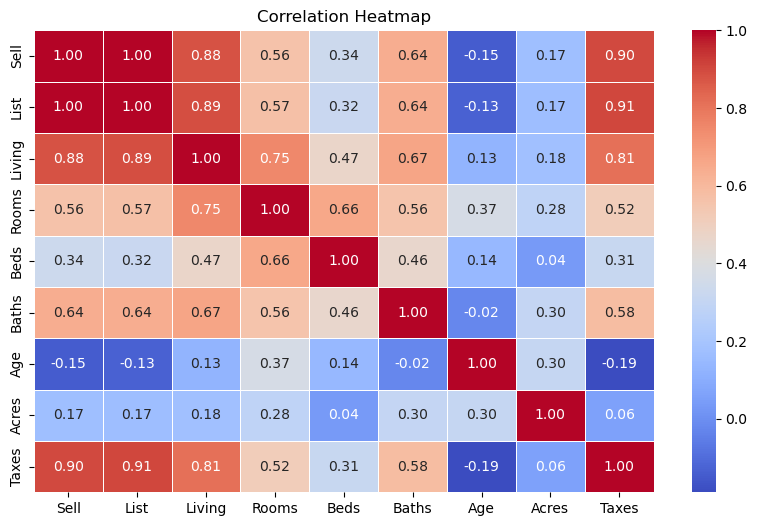

In [6]:
# Compute and plot the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
#EDA Step 2: Correlation Analysis
#The Sell (selling price) variable has a strong positive correlation with:

#List price (0.99), meaning listing price is almost a direct predictor of the selling price.
#Living space (0.71), indicating that larger homes tend to sell for higher prices.
#Taxes (0.51), suggesting a moderate relationship where higher property taxes are associated with higher selling prices.
#The Taxes variable is also correlated with Living space (0.71), meaning larger homes tend to have higher taxes.

#Acres (lot size) has a weak correlation with the selling price (0.15), suggesting that land size has a minimal impact on home prices compared to other variables.

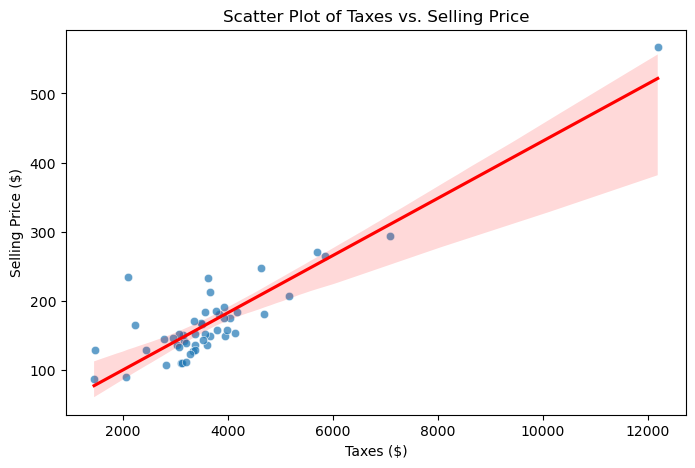

In [7]:
# Scatter plot of Taxes vs. Sell Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Taxes"], y=df["Sell"], alpha=0.7)
sns.regplot(x=df["Taxes"], y=df["Sell"], scatter=False, color="red")
plt.xlabel("Taxes ($)")
plt.ylabel("Selling Price ($)")
plt.title("Scatter Plot of Taxes vs. Selling Price")
plt.show()

In [16]:
#EDA Step 3: Visualizing Taxes vs. Selling Price
#The scatter plot suggests a moderate positive relationship between property taxes and selling price.
#The red regression line indicates an upward trend, but the spread of points suggests some variability in the relationship, meaning taxes alone may not be a strong predictor of selling price.
#Next, I will fit a linear regression model using Taxes as the independent variable and Sell as the dependent variable.

In [17]:
# Fit a linear regression model: Taxes vs. Sell
X = df["Taxes"]
y = df["Sell"]
X = sm.add_constant(X)  # Add intercept
model_taxes = sm.OLS(y, X).fit()
print(model_taxes.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        14:47:28   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

In [19]:
#Regression Analysis: Taxes vs. Selling Price
#R-squared = 0.809: This means that 80.9% of the variance in selling price can be explained by property taxes, indicating a strong relationship.
#p-value for Taxes = 0.000: Since the p-value is very small, the relationship between taxes and selling price is statistically significant.
#Coefficient for Taxes = 0.0414: For every $1 increase in taxes, the selling price increases by $0.0414.
#Intercept = 16.87: This represents the predicted selling price when taxes are zero (not meaningful in practice).

#Is Taxes a Good Predictor?
#While taxes significantly impact selling price, the model suggests some variability, likely due to other factors like home size, listing price, and location.
#The high condition number (10,300) suggests potential multicollinearity issues, meaning taxes alone might not be the best standalone predictor.

#Next, I will repeat this regression using Living (square footage) as the independent variable and compare the models. 

In [18]:
# Fit a linear regression model: Living vs. Sell
X_living = df["Living"]
y = df["Sell"]
X_living = sm.add_constant(X_living)  # Add intercept
model_living = sm.OLS(y, X_living).fit()
print(model_living.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           4.39e-17
Time:                        14:47:31   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

#Regression Analysis: Living Space vs. Selling Price

#R-squared = 0.773: This means 77.3% of the variance in selling price is explained by living space. 
This is slightly lower than the Taxes model (80.9%) but still strong.

#p-value for Living = 0.000: The relationship is statistically significant.

#Coefficient for Living = 7.6613: This means that for every additional square foot of living space, the selling price increases by $7.66.

#Intercept = 8.55: Similar to the previous model, this is less meaningful.

### Which Model is Better?
Taxes Model (R² = 0.809) explains more variance than the Living Model (R² = 0.773), meaning it fits the data better.

Living Model has a lower condition number (62.3 vs. 10,300 in Taxes Model), meaning it is less likely to suffer from multicollinearity issues.

### Limitations of the Models
Both models only consider one variable (either Taxes or Living), while selling price is likely influenced by multiple factors (e.g., location, home features, market conditions).

Multicollinearity concerns in the Taxes model suggest that taxes might be influenced by other correlated variables (like home size).
Potential outliers may be affecting the regression results, especially in selling price.

Conclusion
Taxes is a slightly better predictor than Living space, but neither model fully explains selling price variations.
A multiple regression model incorporating both variables along with other important factors (like List Price and Rooms) would likely be more accurate.